In [11]:
# articles_eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path
plt.style.use("ggplot")      # 可改為預設

# ---------- 1. 讀取 ----------
ARTICLES_CSV = path.join("..","data","articles.csv")
df = pd.read_csv(ARTICLES_CSV)
# ---------- 2. 基本結構 ----------

print("\n【Data shape】", df.shape)
print("\n【dtypes】")
print(df.dtypes)

# ---------- 3. 缺失值統計 ----------
na_pct = df.isna().mean().sort_values(ascending=False)
print("\n【NA ratio (%)】")
print((na_pct*100).round(2))



【Data shape】 (105542, 25)

【dtypes】
article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                

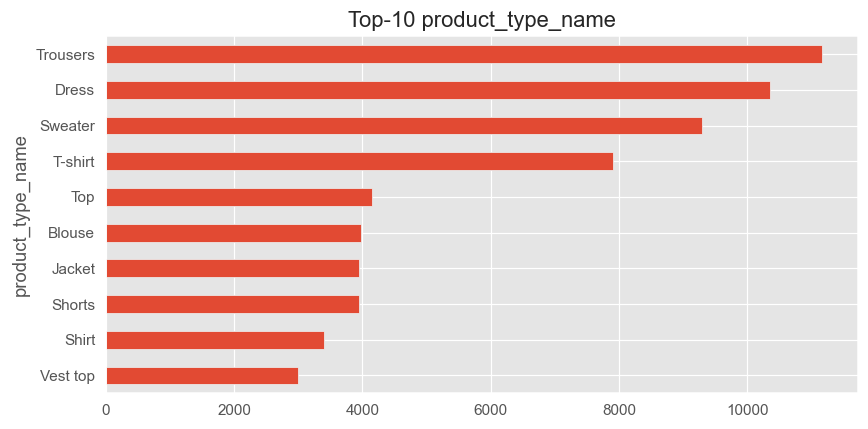

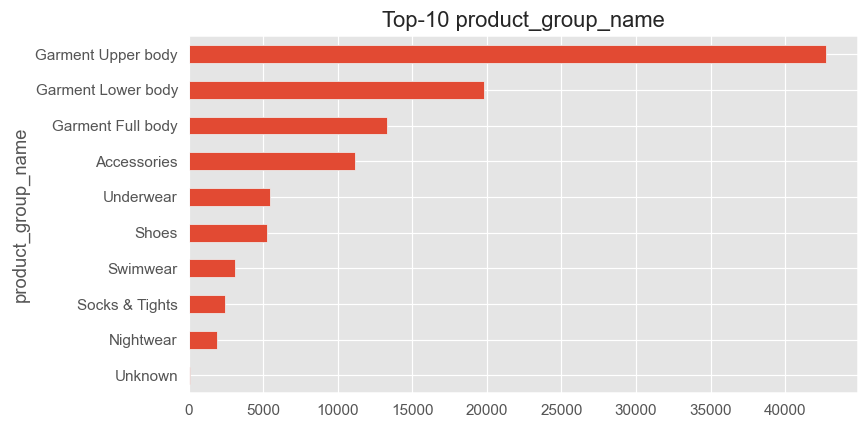

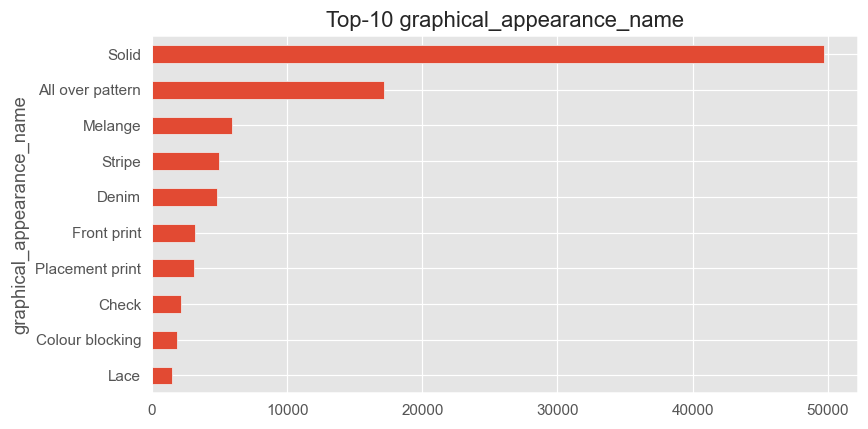

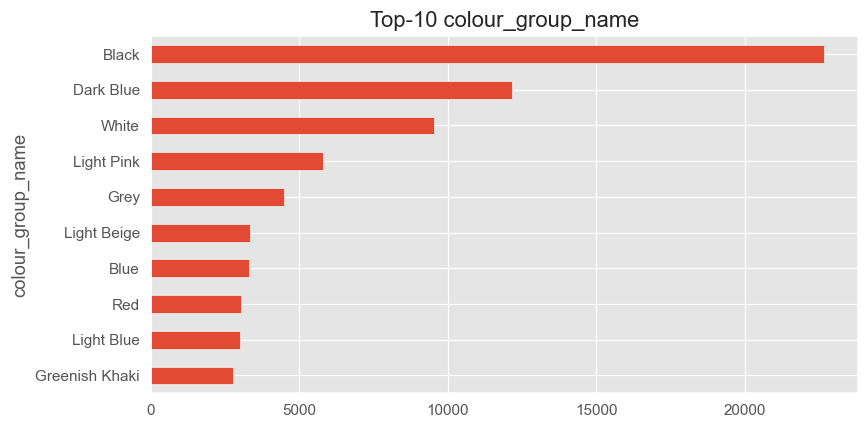

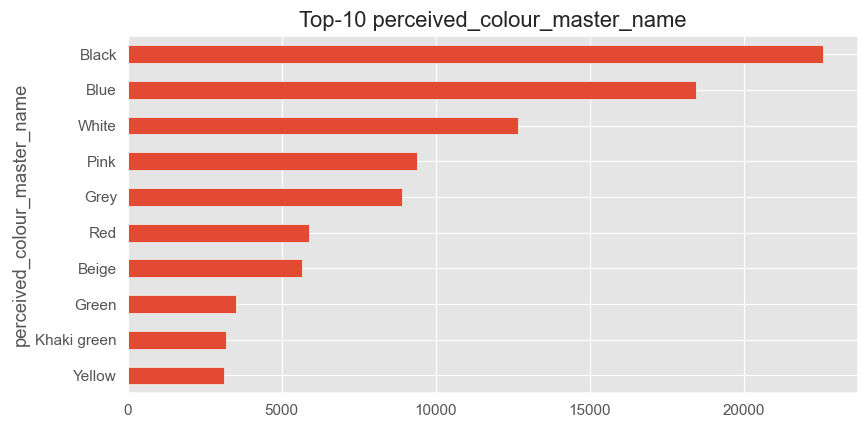

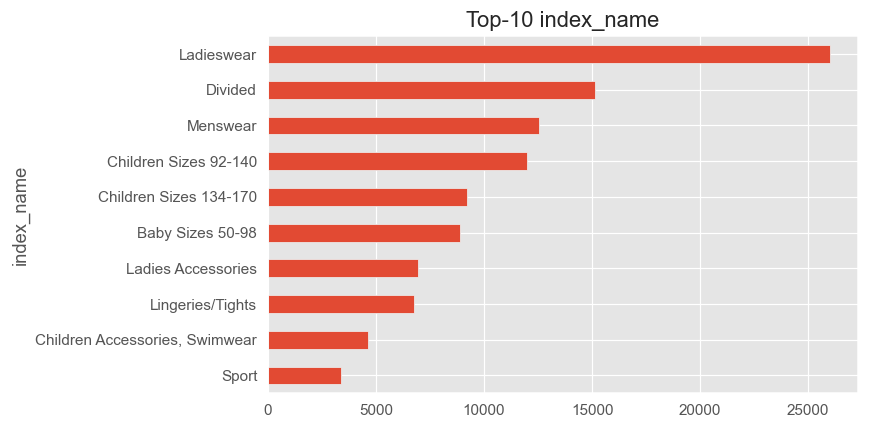

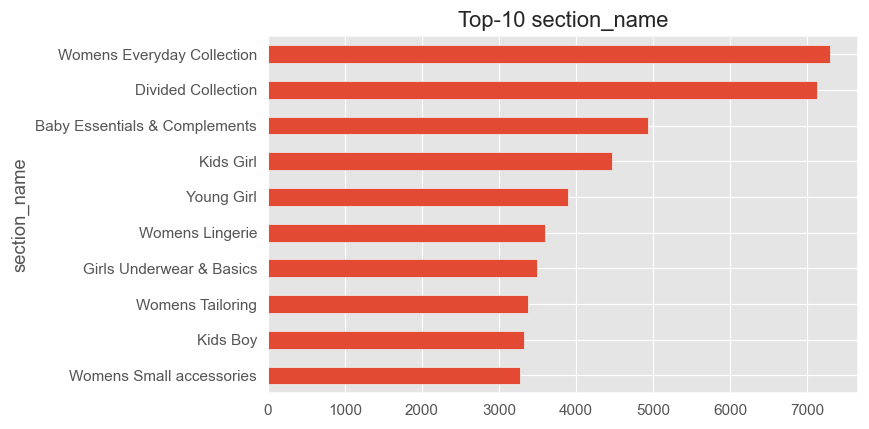

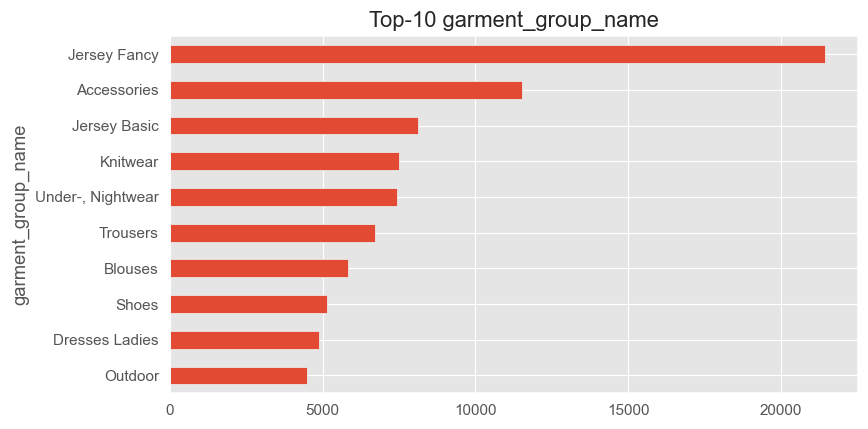

In [12]:
# ---------- 4. 類別欄位分布 ----------
cat_cols = [
    "product_type_name",
    "product_group_name",
    "graphical_appearance_name",
    "colour_group_name",
    "perceived_colour_master_name",
    "index_name",
    "section_name",
    "garment_group_name",
]

for col in cat_cols:
    top10 = df[col].value_counts().head(10)
    ax = top10.plot(kind="barh", figsize=(8,4), title=f"Top-10 {col}")
    ax.invert_yaxis()
    plt.tight_layout()
    #plt.savefig(f"fig_{col}.png")
    plt.show()
    #plt.close()

C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:13: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:13: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:13: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:13: UserWarning: Glyph 29105 (\N{CJK UNIFIED IDEOGRAPH-71B1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:13: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:13: UserWarni

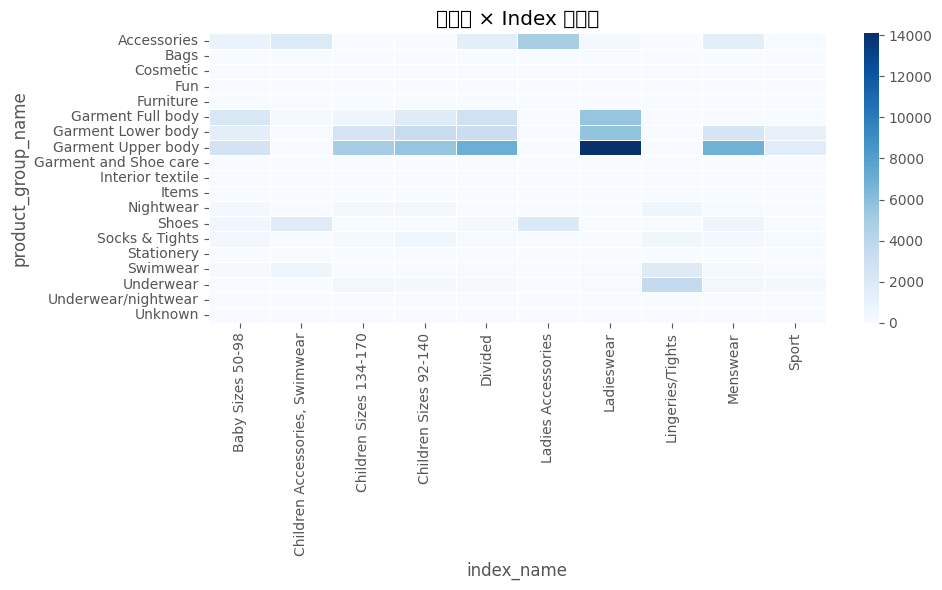

C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:29: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:29: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:29: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:29: UserWarning: Glyph 22806 (\N{CJK UNIFIED IDEOGRAPH-5916}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:29: UserWarning: Glyph 35264 (\N{CJK UNIFIED IDEOGRAPH-89C0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\3114994977.py:29: UserWarni

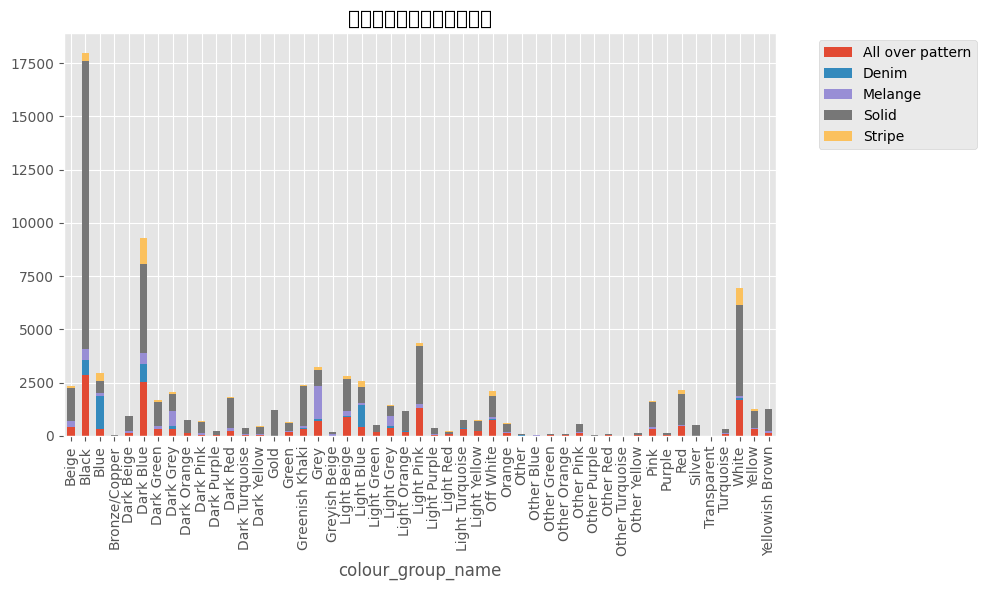

In [8]:
# ---------- 5. 層級／交叉分析 ----------
# (a) product_group_name × index_name
cross_pg_ix = (
    df.groupby(["product_group_name", "index_name"])
      .size()
      .reset_index(name="cnt")
      .pivot(index="product_group_name", columns="index_name", values="cnt")
      .fillna(0)
)
plt.figure(figsize=(10,6))
sns.heatmap(cross_pg_ix, cmap="Blues", linewidths=.5)
plt.title("產品群 × Index 熱力圖")
plt.tight_layout()
plt.show()
# plt.savefig("fig_pg_vs_index.png")
# plt.close()

# (b) graphical_appearance_name × colour_group_name（堆疊柱狀）
top_graph = df["graphical_appearance_name"].value_counts().head(5).index
tmp = df[df["graphical_appearance_name"].isin(top_graph)]
stack_df = (
    tmp.groupby(["graphical_appearance_name", "colour_group_name"])
       .size()
       .unstack(fill_value=0)
)
stack_df.T.plot(kind="bar", stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.title("前五大外觀圖案的顏色組成")
plt.tight_layout()
plt.show()
# plt.savefig("fig_graph_vs_color.png")
# plt.close()


C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\1735345824.py:12: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\1735345824.py:12: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\1735345824.py:12: UserWarning: Glyph 38272 (\N{CJK UNIFIED IDEOGRAPH-9580}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\1735345824.py:12: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\1735345824.py:12: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\1735345824.py:12: UserWarning: Glyph 20998 (\N{CJK UNIFIE

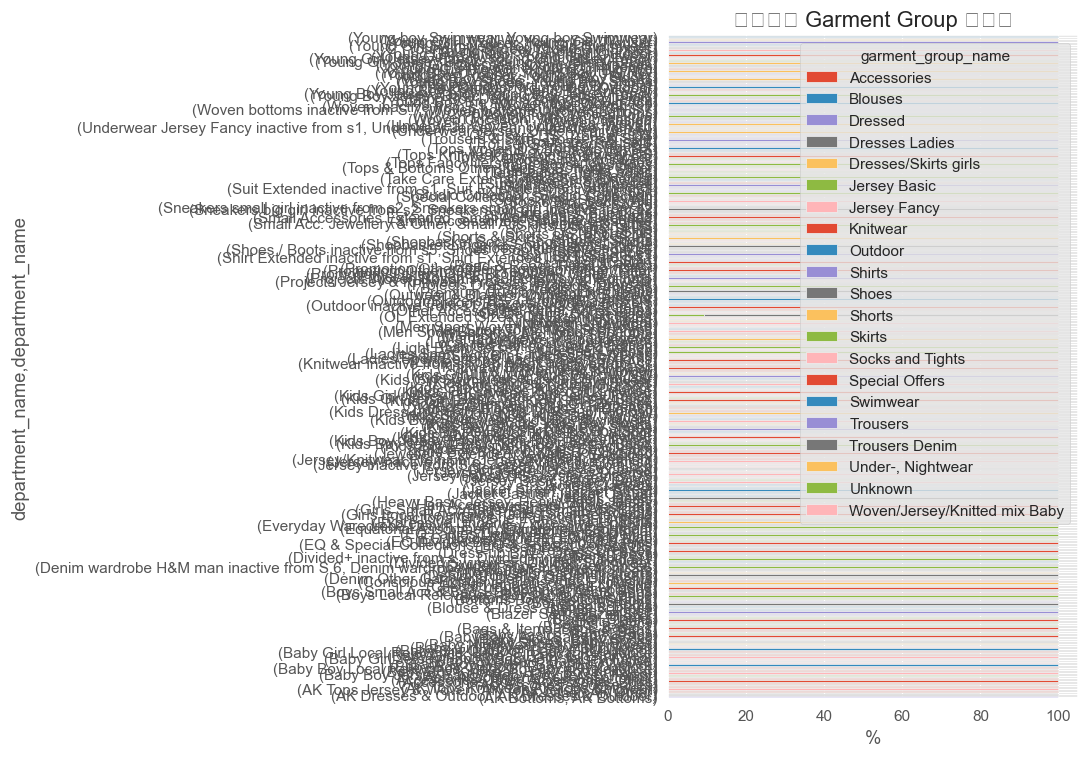

In [13]:
# STEP 5  ──────────────────────────────────────────────────────────────────────
#   部門 & 服飾群組百分比分布
dept_share = (
    df.groupby(["department_name", "garment_group_name"])
      .size()
      .groupby(level=0).apply(lambda x: 100*x/x.sum())
      .unstack(fill_value=0)
)
dept_share.plot(kind="barh", stacked=True, figsize=(10,7))
plt.title("各部門中 Garment Group 百分比")
plt.xlabel("%")
plt.tight_layout()
plt.show()
# plt.savefig(OUT_DIR / "fig_dept_garment_share.png")
# plt.close()

C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\2124397207.py:8: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\2124397207.py:8: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\2124397207.py:8: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\2124397207.py:8: UserWarning: Glyph 31281 (\N{CJK UNIFIED IDEOGRAPH-7A31}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\2124397207.py:8: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\louislin\AppData\Local\Temp\ipykernel_63004\2124397207.py:8: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEO

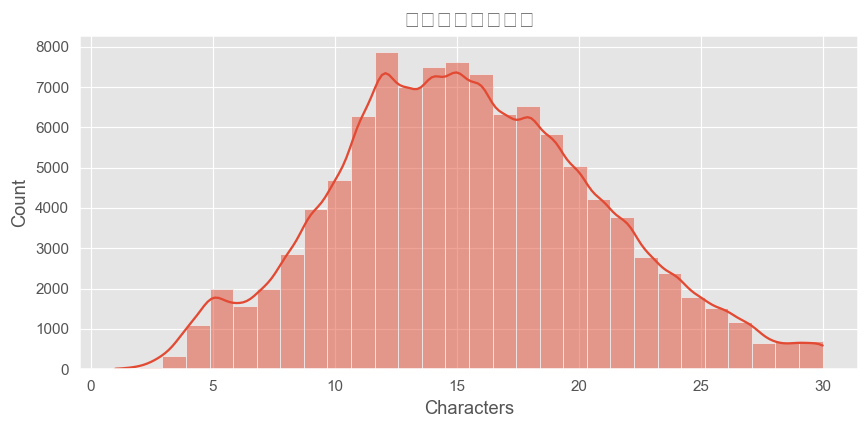

In [14]:
# STEP 6  ──────────────────────────────────────────────────────────────────────
#   產品名稱長度（字數）分布
df["name_len"] = df["prod_name"].str.len()
plt.figure(figsize=(8,4))
sns.histplot(df["name_len"], bins=30, kde=True)
plt.title("商品名稱長度分布")
plt.xlabel("Characters")
plt.tight_layout()
plt.show()
# plt.savefig(OUT_DIR / "fig_name_len.png")
# plt.close()

In [ ]:
# STEP 7  ──────────────────────────────────────────────────────────────────────
#   ⬇ 若要做「價格 & 時間」分析 (需 transactions_train.csv) 把下段解除註解
TRANS = path.join("..","data","transactions_train.csv")
print("📦 讀入 transactions_train.csv …")
tx = pd.read_csv(TRANS, parse_dates=["t_dat"])

# 計算每件 article 的平均價格 & 銷量
tx_agg = (
    tx.groupby("article_id")
      .agg(mean_price=("price", "mean"), sales_cnt=("t_dat", "size"))
      .reset_index()
)
df_tx = df.merge(tx_agg, on="article_id", how="left")

# 價格分布
plt.figure(figsize=(8,4))
sns.histplot(df_tx["mean_price"].dropna(), bins=50, kde=True)
plt.title("Article 平均售價分布")
plt.tight_layout()
plt.show()
# plt.savefig(OUT_DIR / "fig_price_hist.png")
# plt.close()

# 銷售季節性 (月粒度)
tx["month"] = tx["t_dat"].dt.to_period("M")
month_cnt = tx.groupby("month").size()
month_cnt.plot(figsize=(10,4))
plt.title("整體銷售量（月）")
plt.ylabel("Purchases")
plt.tight_layout()
plt.show()
# plt.savefig(OUT_DIR / "fig_monthly_sales.png")
# plt.close()
